In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Customer Churn.csv')
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


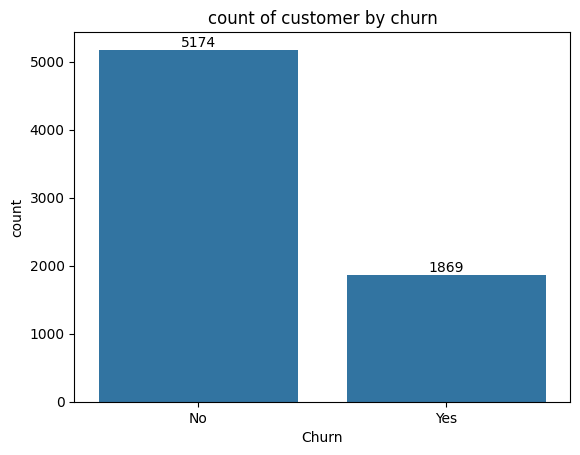

In [51]:
ax=sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn
plt.show()

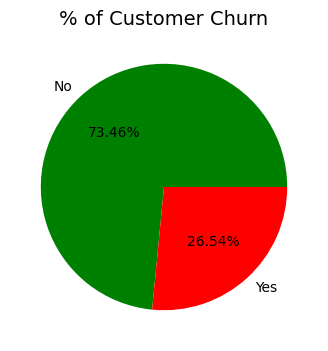

In [40]:
import matplotlib.pyplot as plt

# Group by churn column and count
gb = df.groupby('Churn').agg({'Churn': 'count'})



# Define colors: if label == 'Yes', make it red else green
colors = ['green' if label == 'No' else 'red' for label in gb.index]

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    gb['Churn'],
    labels=gb.index,
    autopct='%1.2f%%',
    colors=colors
)
plt.title("% of Customer Churn", fontsize=14, color="black")
plt.show()


#### here it is clear that our 26.54% customers have churned out
# but why lets dive into it 

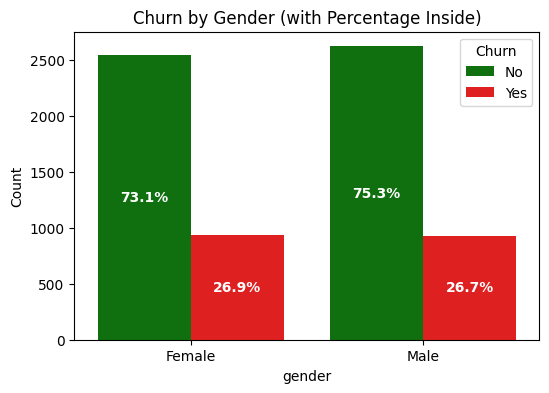

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group karna
data = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')

# Total count by gender for % calculation
total_by_gender = data.groupby('gender')['Count'].transform('sum')
data['Percent'] = 100 * data['Count'] / total_by_gender

# Plot setup
plt.figure(figsize=(6, 4))
palette = {'No': 'green', 'Yes': 'red'}


# Bar plot
bar = sns.barplot(
    x='gender',
    y='Count',
    hue='Churn',
    data=data,
    palette=palette
)

# Label percentage inside each bar
for container in bar.containers:
    for rect in container:
        height = rect.get_height()
        label = f'{height / total_by_gender.iloc[0] * 100:.1f}%'
        bar.annotate(
            label,
            (rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
            ha='center',
            va='center',
            color='white',
            fontsize=10,
            fontweight='bold'
        )

plt.title('Churn by Gender (with Percentage Inside)')
plt.ylabel('Count')
plt.show()


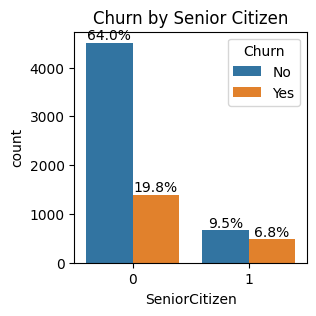

In [36]:
plt.figure(figsize=(3, 3))

# Countplot
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)

# Total bars for calculating %
total = len(df)

# For each bar in the plot
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage,
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black')

plt.title("Churn by Senior Citizen")
plt.show()

#Our current customer base consists primarily of non-senior citizens (youths), who make up the largest portion of both churned and retained users.
#Despite fewer senior citizens in the dataset, their churn percentage is lower relative to their group size.
#Actionable Insight: We must focus more on retaining non-senior (youth) customers, as they represent a significant portion of our business and are more likely to churn.

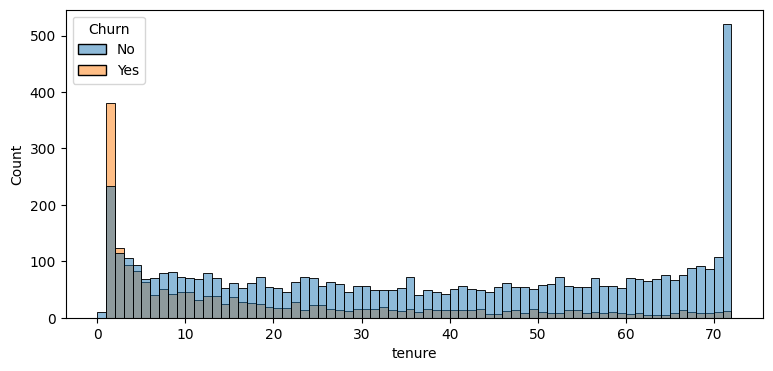

In [74]:
plt.figure(figsize=(9, 4))
sns.histplot(x="tenure",data = df,bins = 72,hue = "Churn")
plt.show()

here clear that drastic churn whinin first month apx. from 400 churn out 190 costumber and 2nd month is is appx 5 and which coustmers leads to stay for long term after 2 month churn out is appx negligible


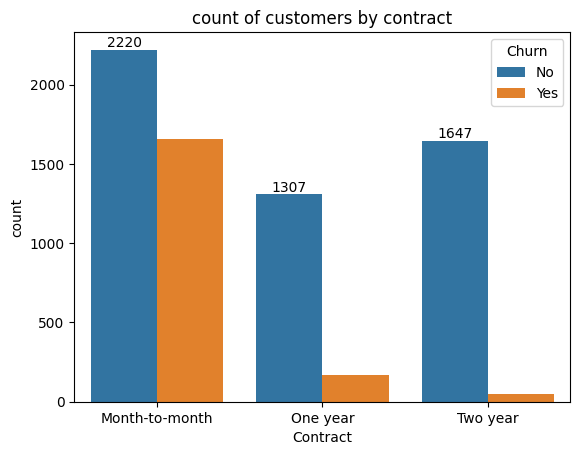

In [72]:
ax=sns.countplot(x=df['Contract'],data = df,hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by contract")
plt.show()

customers month to month = more churn in caprision to one year > two year
So my suggestion would be like as usually all buisnesses done try to convience coustomers to stay for long as churn decreases and also recuuring profit is better that short time

In [79]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

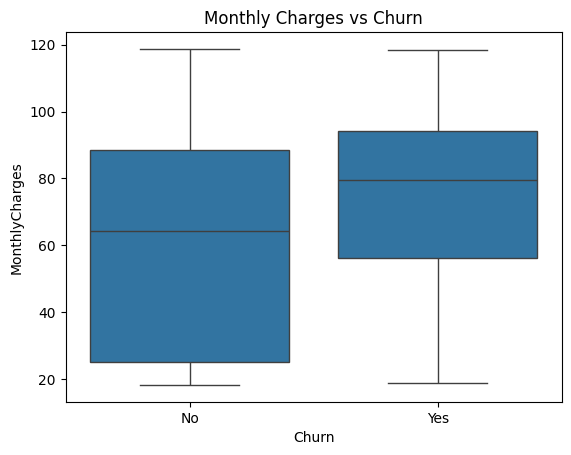

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


More monthly charges tends to more churn

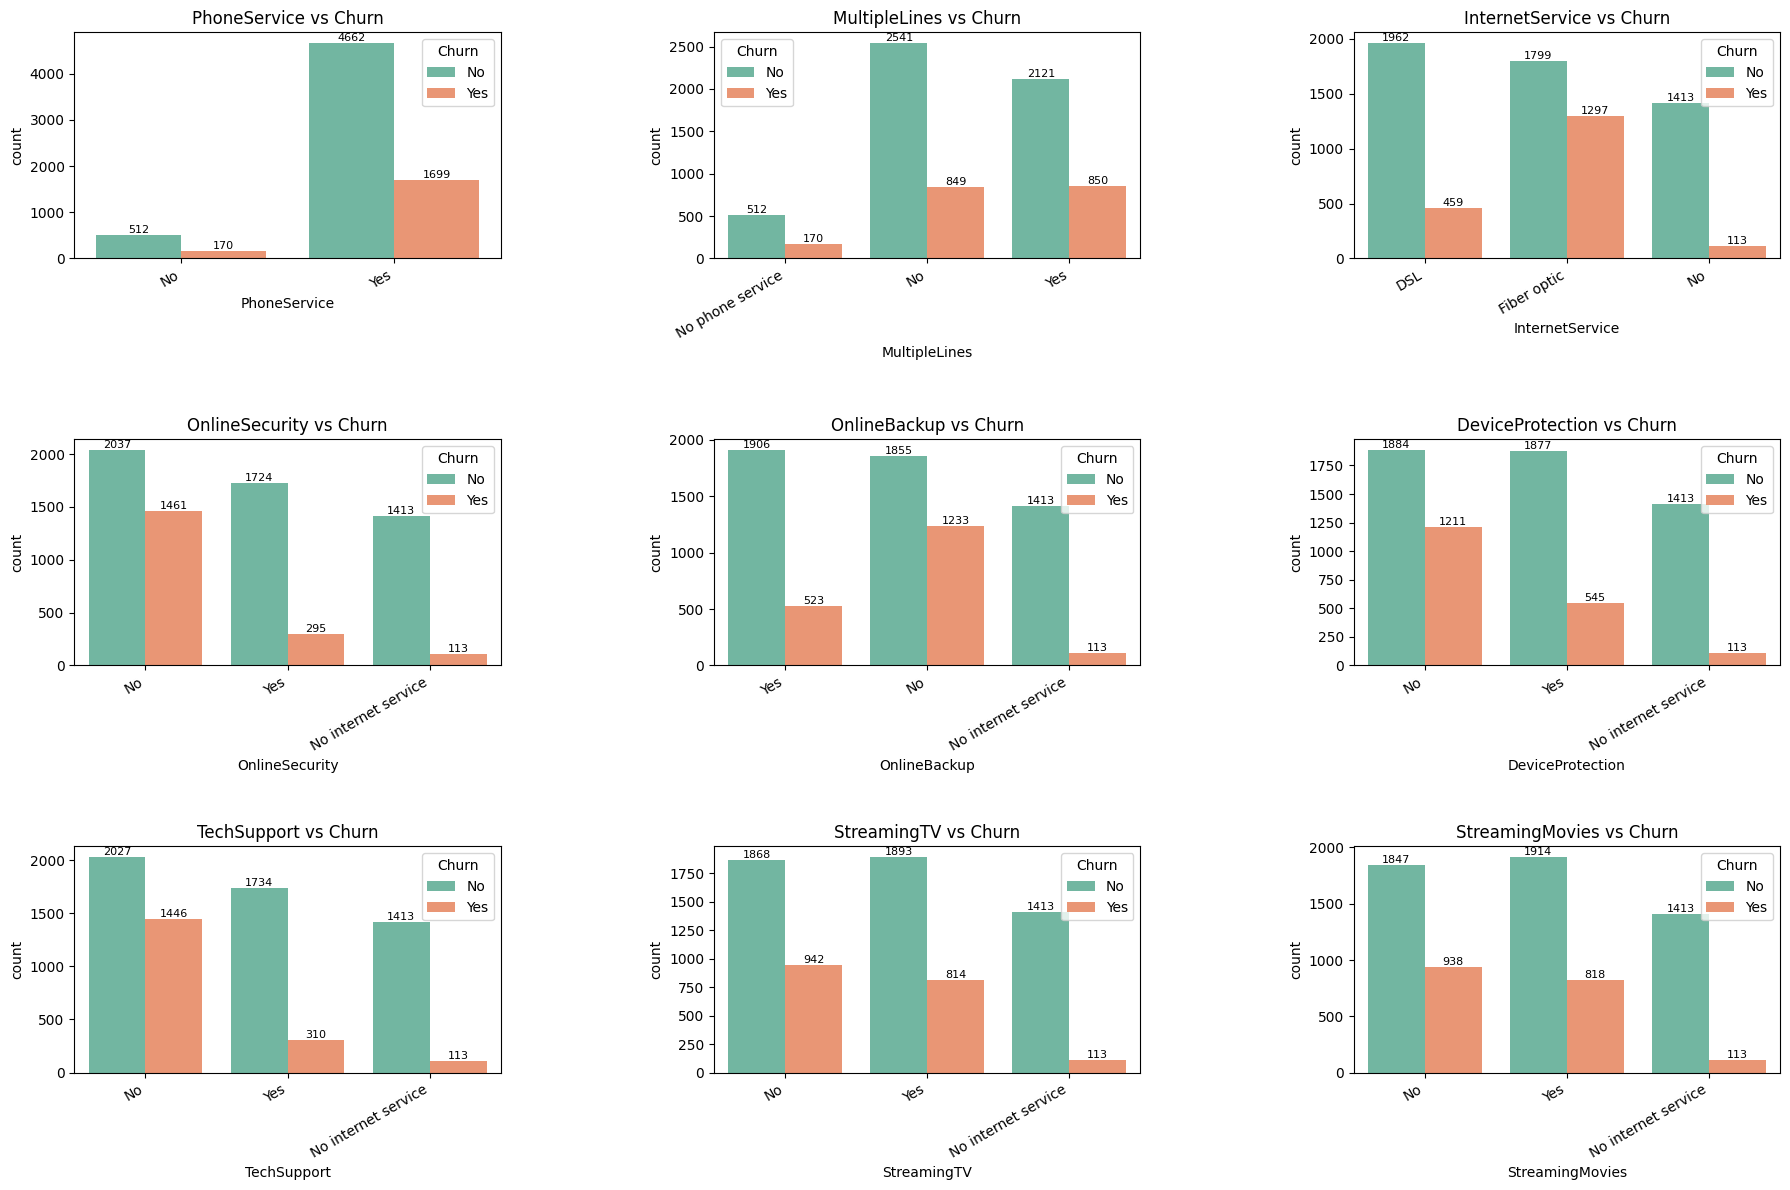

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded

# List of categorical service-related columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the figure size
plt.figure(figsize=(18, 12))

# Loop to create subplots
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='Set2')

    # Title and formatting
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xticks(rotation=30, ha='right')
    
    # Add value labels to bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

# Adjust spacing between plots
plt.tight_layout()
plt.subplots_adjust(hspace=.8, wspace=.5)

# Show plot
plt.show()


Customers who do not use online services like OnlineSecurity, TechSupport, DeviceProtection, and OnlineBackup tend to churn more. Additionally, no internet service users have lower churn, suggesting that churn is high among internet users lacking digital support services. Providing bundled or value-added services may help reduce churn.

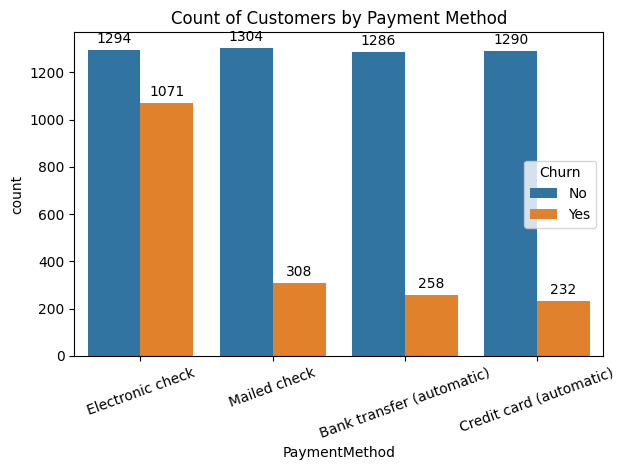

In [33]:
ax = sns.countplot(x=df['PaymentMethod'], data=df, hue="Churn")

# Add labels with padding to avoid overlap
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title("Count of Customers by Payment Method")
plt.xticks(rotation=20)  # Optional: thoda angle de ke clear dikhe
plt.tight_layout()       # Layout ko adjust kare overlap se bachne ke liye
plt.show()


Electronic check = more churn

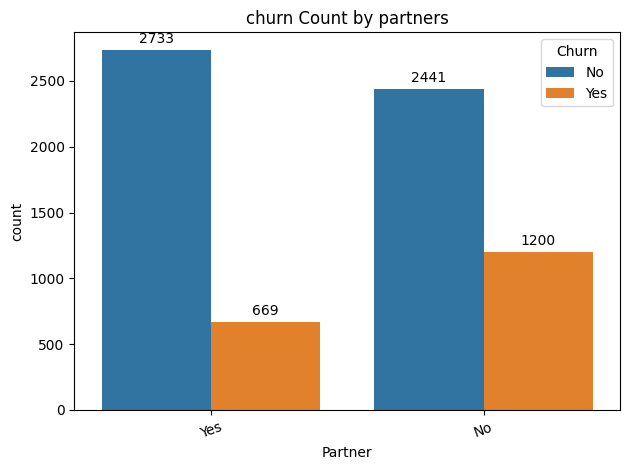

In [35]:
ax = sns.countplot(x=df["Partner"], data=df, hue="Churn")

# Add labels with padding to avoid overlap
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title("churn Count by partners")
plt.xticks(rotation=20)  # Optional: thoda angle de ke clear dikhe
plt.tight_layout()       # Layout ko adjust kare overlap se bachne ke liye
plt.show()


with partners churn rate is less i.e 669 but appx.1.5 times non parterns i.e 1200 churn rate